<a href="https://colab.research.google.com/github/dspark0419/DATA-205/blob/main/Project_ZipMap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy import random

In [ ]:
import json
import requests

# **Dataset: MC Map for Zip Codes**

In [ ]:
!pip install geopandas
!pip install adjustText
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point
import adjustText as aT

In [ ]:
!pip install --upgrade plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.7/dist-packages (4.14.3)


In [ ]:
mcZipMap = gpd.read_file('ZipCode_2017.shp')

In [ ]:
mcZipMap.head()

,OBJECTID,ZIPCODE,POSTAL,STATE,SDEZIPCODE,geometry
0,336,20707,LAUREL,MD,3.406347e+08,"POLYGON ((-76.88764 39.13193, -76.88766 39.131..."
1,404,20777,HIGHLAND,MD,2.077615e+08,"POLYGON ((-76.97442 39.19969, -76.97371 39.198..."
2,413,20833,BROOKEVILLE,MD,5.679860e+07,"MULTIPOLYGON (((-77.06566 39.27010, -77.06462 ..."
3,414,20866,BURTONSVILLE,MD,3.506130e+04,"POLYGON ((-76.89065 39.13044, -76.89069 39.130..."
4,415,20868,SPENCERVILLE,MD,5.180459e+04,"POLYGON ((-76.94830 39.12929, -76.94831 39.129..."


In [ ]:
# find the representative points. may use centroid instead of representative_point()
mcZipMap['center'] = mcZipMap['geometry'].representative_point()

In [ ]:
mcZipMap.head()

,OBJECTID,ZIPCODE,POSTAL,STATE,SDEZIPCODE,geometry,center
0,336,20707,LAUREL,MD,3.406347e+08,"POLYGON ((-76.88764 39.13193, -76.88766 39.131...",POINT (-76.88158 39.09424)
1,404,20777,HIGHLAND,MD,2.077615e+08,"POLYGON ((-76.97442 39.19969, -76.97371 39.198...",POINT (-76.97506 39.17294)
2,413,20833,BROOKEVILLE,MD,5.679860e+07,"MULTIPOLYGON (((-77.06566 39.27010, -77.06462 ...",POINT (-77.05486 39.24741)
3,414,20866,BURTONSVILLE,MD,3.506130e+04,"POLYGON ((-76.89065 39.13044, -76.89069 39.130...",POINT (-76.88959 39.13114)
4,415,20868,SPENCERVILLE,MD,5.180459e+04,"POLYGON ((-76.94830 39.12929, -76.94831 39.129...",POINT (-76.95363 39.13169)


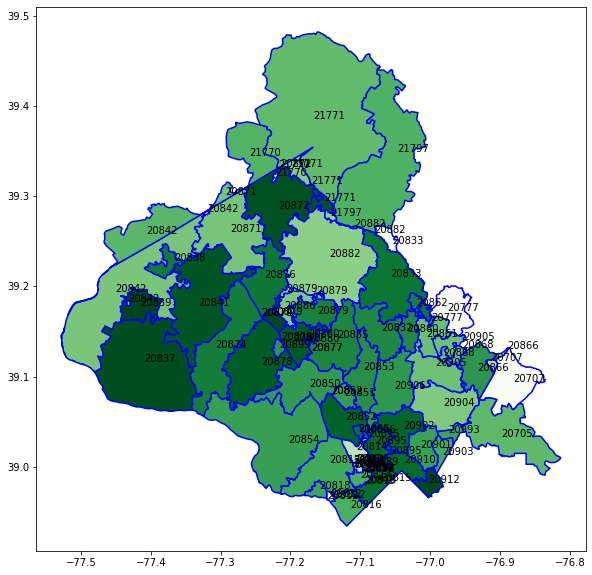

In [ ]:
# plot the basemap
mcZipMap.plot(figsize=(10, 10), cmap='Greens', edgecolor='blue', linewidth=1.5)

texts = []

# annotate the zip codes
for x, y, label in zip(mcZipMap.center.x, mcZipMap.center.y, mcZipMap['ZIPCODE']):
  texts.append(plt.text(x, y, label, fontsize = 10))

# adjust texts
# aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1),
#                arrowprops=dict(arrowstyle='-', color='black', lw=1.5))
plt.show()

## **Areas of Polygons**

For the same zip codes, use the zip code with the largest area and hide other zip codes.  
Neet to calculate the area of each polygon.

from osgeo import ogr

shapefile = "ZipCode_2017.shp"
driver = ogr.GetDriverByName("ESRI Shapefile")
dataSource = driver.Open(shapefile, 1)
layer = dataSource.GetLayer()
new_field = ogr.FieldDefn("Area", ogr.OFTReal)
new_field.SetWidth(32)
new_field.SetPrecision(6)
layer.CreateField(new_field)

for feature in layer:
    geom = feature.GetGeometryRef()
    area = geom.GetArea() * 1000
    feature.SetField("Area", area)
    layer.SetFeature(feature)

dataSource = None

In [ ]:
#mcZipMap.crs

In [ ]:
#mcZipMap = mcZipMap.to_crs("EPSG:3035") # equal area projection

In [ ]:
for index, row in mcZipMap.iterrows():
    # Get the area of the polygon
    poly_area = row['geometry'].area

In [ ]:
mcZipMap['Area'] = mcZipMap.area

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


In [ ]:
mcZipMap.head()

,OBJECTID,ZIPCODE,POSTAL,STATE,SDEZIPCODE,geometry,center,Area
0,336,20707,LAUREL,MD,3.406347e+08,"POLYGON ((-76.88764 39.13193, -76.88766 39.131...",POINT (-76.88158 39.09424),3.295238e-03
1,404,20777,HIGHLAND,MD,2.077615e+08,"POLYGON ((-76.97442 39.19969, -76.97371 39.198...",POINT (-76.97506 39.17294),2.012115e-03
2,413,20833,BROOKEVILLE,MD,5.679860e+07,"MULTIPOLYGON (((-77.06566 39.27010, -77.06462 ...",POINT (-77.05486 39.24741),5.506706e-04
3,414,20866,BURTONSVILLE,MD,3.506130e+04,"POLYGON ((-76.89065 39.13044, -76.89069 39.130...",POINT (-76.88959 39.13114),3.393544e-07
4,415,20868,SPENCERVILLE,MD,5.180459e+04,"POLYGON ((-76.94830 39.12929, -76.94831 39.129...",POINT (-76.95363 39.13169),5.014188e-07


## **Removing Zip Codes outside MC**

In [ ]:
mcZipMap[mcZipMap['ZIPCODE'] == 20705]

,OBJECTID,ZIPCODE,POSTAL,STATE,SDEZIPCODE,geometry,center,Area
57,807,20705,BELTSVILLE,MD,5.499108e+08,"POLYGON ((-76.91305 39.07632, -76.90484 39.074...",POINT (-76.89885 39.03356),0.005316


In [ ]:
mcZipMap[mcZipMap['ZIPCODE'] == 20707]

,OBJECTID,ZIPCODE,POSTAL,STATE,SDEZIPCODE,geometry,center,Area
0,336,20707,LAUREL,MD,3.406347e+08,"POLYGON ((-76.88764 39.13193, -76.88766 39.131...",POINT (-76.88158 39.09424),0.003295
35,694,20707,LAUREL,MD,2.188329e+07,"POLYGON ((-76.88776 39.13176, -76.89107 39.127...",POINT (-76.91335 39.11759),0.000212


In [ ]:
mcZipMap[mcZipMap['ZIPCODE'] == 20777]

,OBJECTID,ZIPCODE,POSTAL,STATE,SDEZIPCODE,geometry,center,Area
1,404,20777,HIGHLAND,MD,2.077615e+08,"POLYGON ((-76.97442 39.19969, -76.97371 39.198...",POINT (-76.97506 39.17294),0.002012
77,831,20777,HIGHLAND,MD,5.643254e+06,"POLYGON ((-77.00054 39.16932, -77.00038 39.169...",POINT (-76.99845 39.16212),0.000055


In [ ]:
mcZipMap[mcZipMap['ZIPCODE'] == 20833]

,OBJECTID,ZIPCODE,POSTAL,STATE,SDEZIPCODE,geometry,center,Area
2,413,20833,BROOKEVILLE,MD,5.679860e+07,"MULTIPOLYGON (((-77.06566 39.27010, -77.06462 ...",POINT (-77.05486 39.24741),0.000551
86,840,20833,BROOKEVILLE,MD,5.568872e+08,"POLYGON ((-77.09291 39.26237, -77.09266 39.261...",POINT (-77.05673 39.21024),0.005395


In [ ]:
mcZipMap[mcZipMap['ZIPCODE'] == 20842]

,OBJECTID,ZIPCODE,POSTAL,STATE,SDEZIPCODE,geometry,center,Area
39,698,20842,DICKERSON,MD,2.759828e+06,"POLYGON ((-77.42960 39.17884, -77.42980 39.178...",POINT (-77.43185 39.18239),0.000027
44,841,20842,DICKERSON,MD,3.121267e+06,"POLYGON ((-77.31586 39.28543, -77.31608 39.284...",POINT (-77.31968 39.28213),0.000030
50,849,20842,DICKERSON,MD,1.135536e+09,"POLYGON ((-77.32546 39.27756, -77.32559 39.277...",POINT (-77.45088 39.19332),0.011000
58,811,20842,DICKERSON,MD,3.959792e+08,"MULTIPOLYGON (((-77.38820 39.29250, -77.38595 ...",POINT (-77.40618 39.25794),0.003840


In [ ]:
mcZipMap[mcZipMap['ZIPCODE'] == 20866]

,OBJECTID,ZIPCODE,POSTAL,STATE,SDEZIPCODE,geometry,center,Area
3,414,20866,BURTONSVILLE,MD,3.506130e+04,"POLYGON ((-76.89065 39.13044, -76.89069 39.130...",POINT (-76.88959 39.13114),3.393544e-07
73,827,20866,BURTONSVILLE,MD,2.017397e+08,"POLYGON ((-76.92832 39.13864, -76.92820 39.138...",POINT (-76.93257 39.10675),1.952025e-03


In [ ]:
mcZipMap[mcZipMap['ZIPCODE'] == 20871]

,OBJECTID,ZIPCODE,POSTAL,STATE,SDEZIPCODE,geometry,center,Area
51,850,20871,CLARKSBURG,MD,5.782691e+08,"POLYGON ((-77.26385 39.29588, -77.26407 39.295...",POINT (-77.28644 39.26078),0.005607
52,851,20871,CLARKSBURG,MD,3.774081e+07,"POLYGON ((-77.28678 39.31278, -77.28505 39.312...",POINT (-77.29289 39.30096),0.000366


In [ ]:
mcZipMap[mcZipMap['ZIPCODE'] == 20882]

,OBJECTID,ZIPCODE,POSTAL,STATE,SDEZIPCODE,geometry,center,Area
5,416,20882,GAITHERSBURG,MD,3.806057e+02,"POLYGON ((-77.08053 39.25937, -77.08046 39.259...",POINT (-77.08083 39.25946),3.690383e-09
45,842,20882,GAITHERSBURG,MD,1.010405e+09,"POLYGON ((-77.15684 39.28508, -77.15692 39.283...",POINT (-77.14524 39.23220),9.793172e-03
59,812,20882,GAITHERSBURG,MD,3.472351e+06,"MULTIPOLYGON (((-77.11474 39.26552, -77.10581 ...",POINT (-77.10875 39.26577),3.366796e-05


In [ ]:
mcZipMap[mcZipMap['ZIPCODE'] == 21770]

,OBJECTID,ZIPCODE,POSTAL,STATE,SDEZIPCODE,geometry,center,Area
12,707,21770,MONROVIA,MD,5.994021e+06,"POLYGON ((-77.21802 39.32732, -77.21784 39.323...",POINT (-77.22139 39.32278),5.816809e-05
46,843,21770,MONROVIA,MD,1.205979e+04,"POLYGON ((-77.21686 39.33128, -77.21723 39.331...",POINT (-77.21716 39.33117),1.170487e-07
60,814,21770,MONROVIA,MD,3.107496e+08,"POLYGON ((-77.25632 39.38179, -77.25007 39.380...",POINT (-77.25953 39.34492),3.016932e-03


In [ ]:
mcZipMap[mcZipMap['ZIPCODE'] == 21771]

,OBJECTID,ZIPCODE,POSTAL,STATE,SDEZIPCODE,geometry,center,Area
43,702,21771,MT AIRY,MD,1.021610e+03,"POLYGON ((-77.16996 39.31321, -77.17018 39.313...",POINT (-77.17009 39.31320),9.912970e-09
47,844,21771,MT AIRY,MD,6.238017e+07,"POLYGON ((-77.18024 39.34648, -77.18036 39.346...",POINT (-77.19857 39.33293),6.054258e-04
56,809,21771,MT. AIRY,MD,2.272783e+09,"MULTIPOLYGON (((-77.15554 39.48052, -77.15267 ...",POINT (-77.16750 39.38527),2.207873e-02
98,874,21771,MT AIRY,MD,5.397654e+07,"POLYGON ((-77.16415 39.30730, -77.16404 39.307...",POINT (-77.15190 39.29480),5.236001e-04


In [ ]:
mcZipMap[mcZipMap['ZIPCODE'] == 21797]

,OBJECTID,ZIPCODE,POSTAL,STATE,SDEZIPCODE,geometry,center,Area
42,701,21797,WOODBINE,MD,1.351050e+07,"POLYGON ((-77.13810 39.27948, -77.13797 39.279...",POINT (-77.14323 39.27773),0.000131
61,815,21797,WOODBINE,MD,1.242928e+09,"POLYGON ((-77.07247 39.43968, -77.07203 39.439...",POINT (-77.04737 39.34930),0.012064


## **MC Zip Codes**

In [ ]:
# select the objectiIDs that are outside MC
zip_out = [336, 404, 413, 414, 416, 702, 707, 807, 809, 811, 812, 814, 815, 843, 851]
mcZip = mcZipMap[~mcZipMap['OBJECTID'].isin(zip_out)]

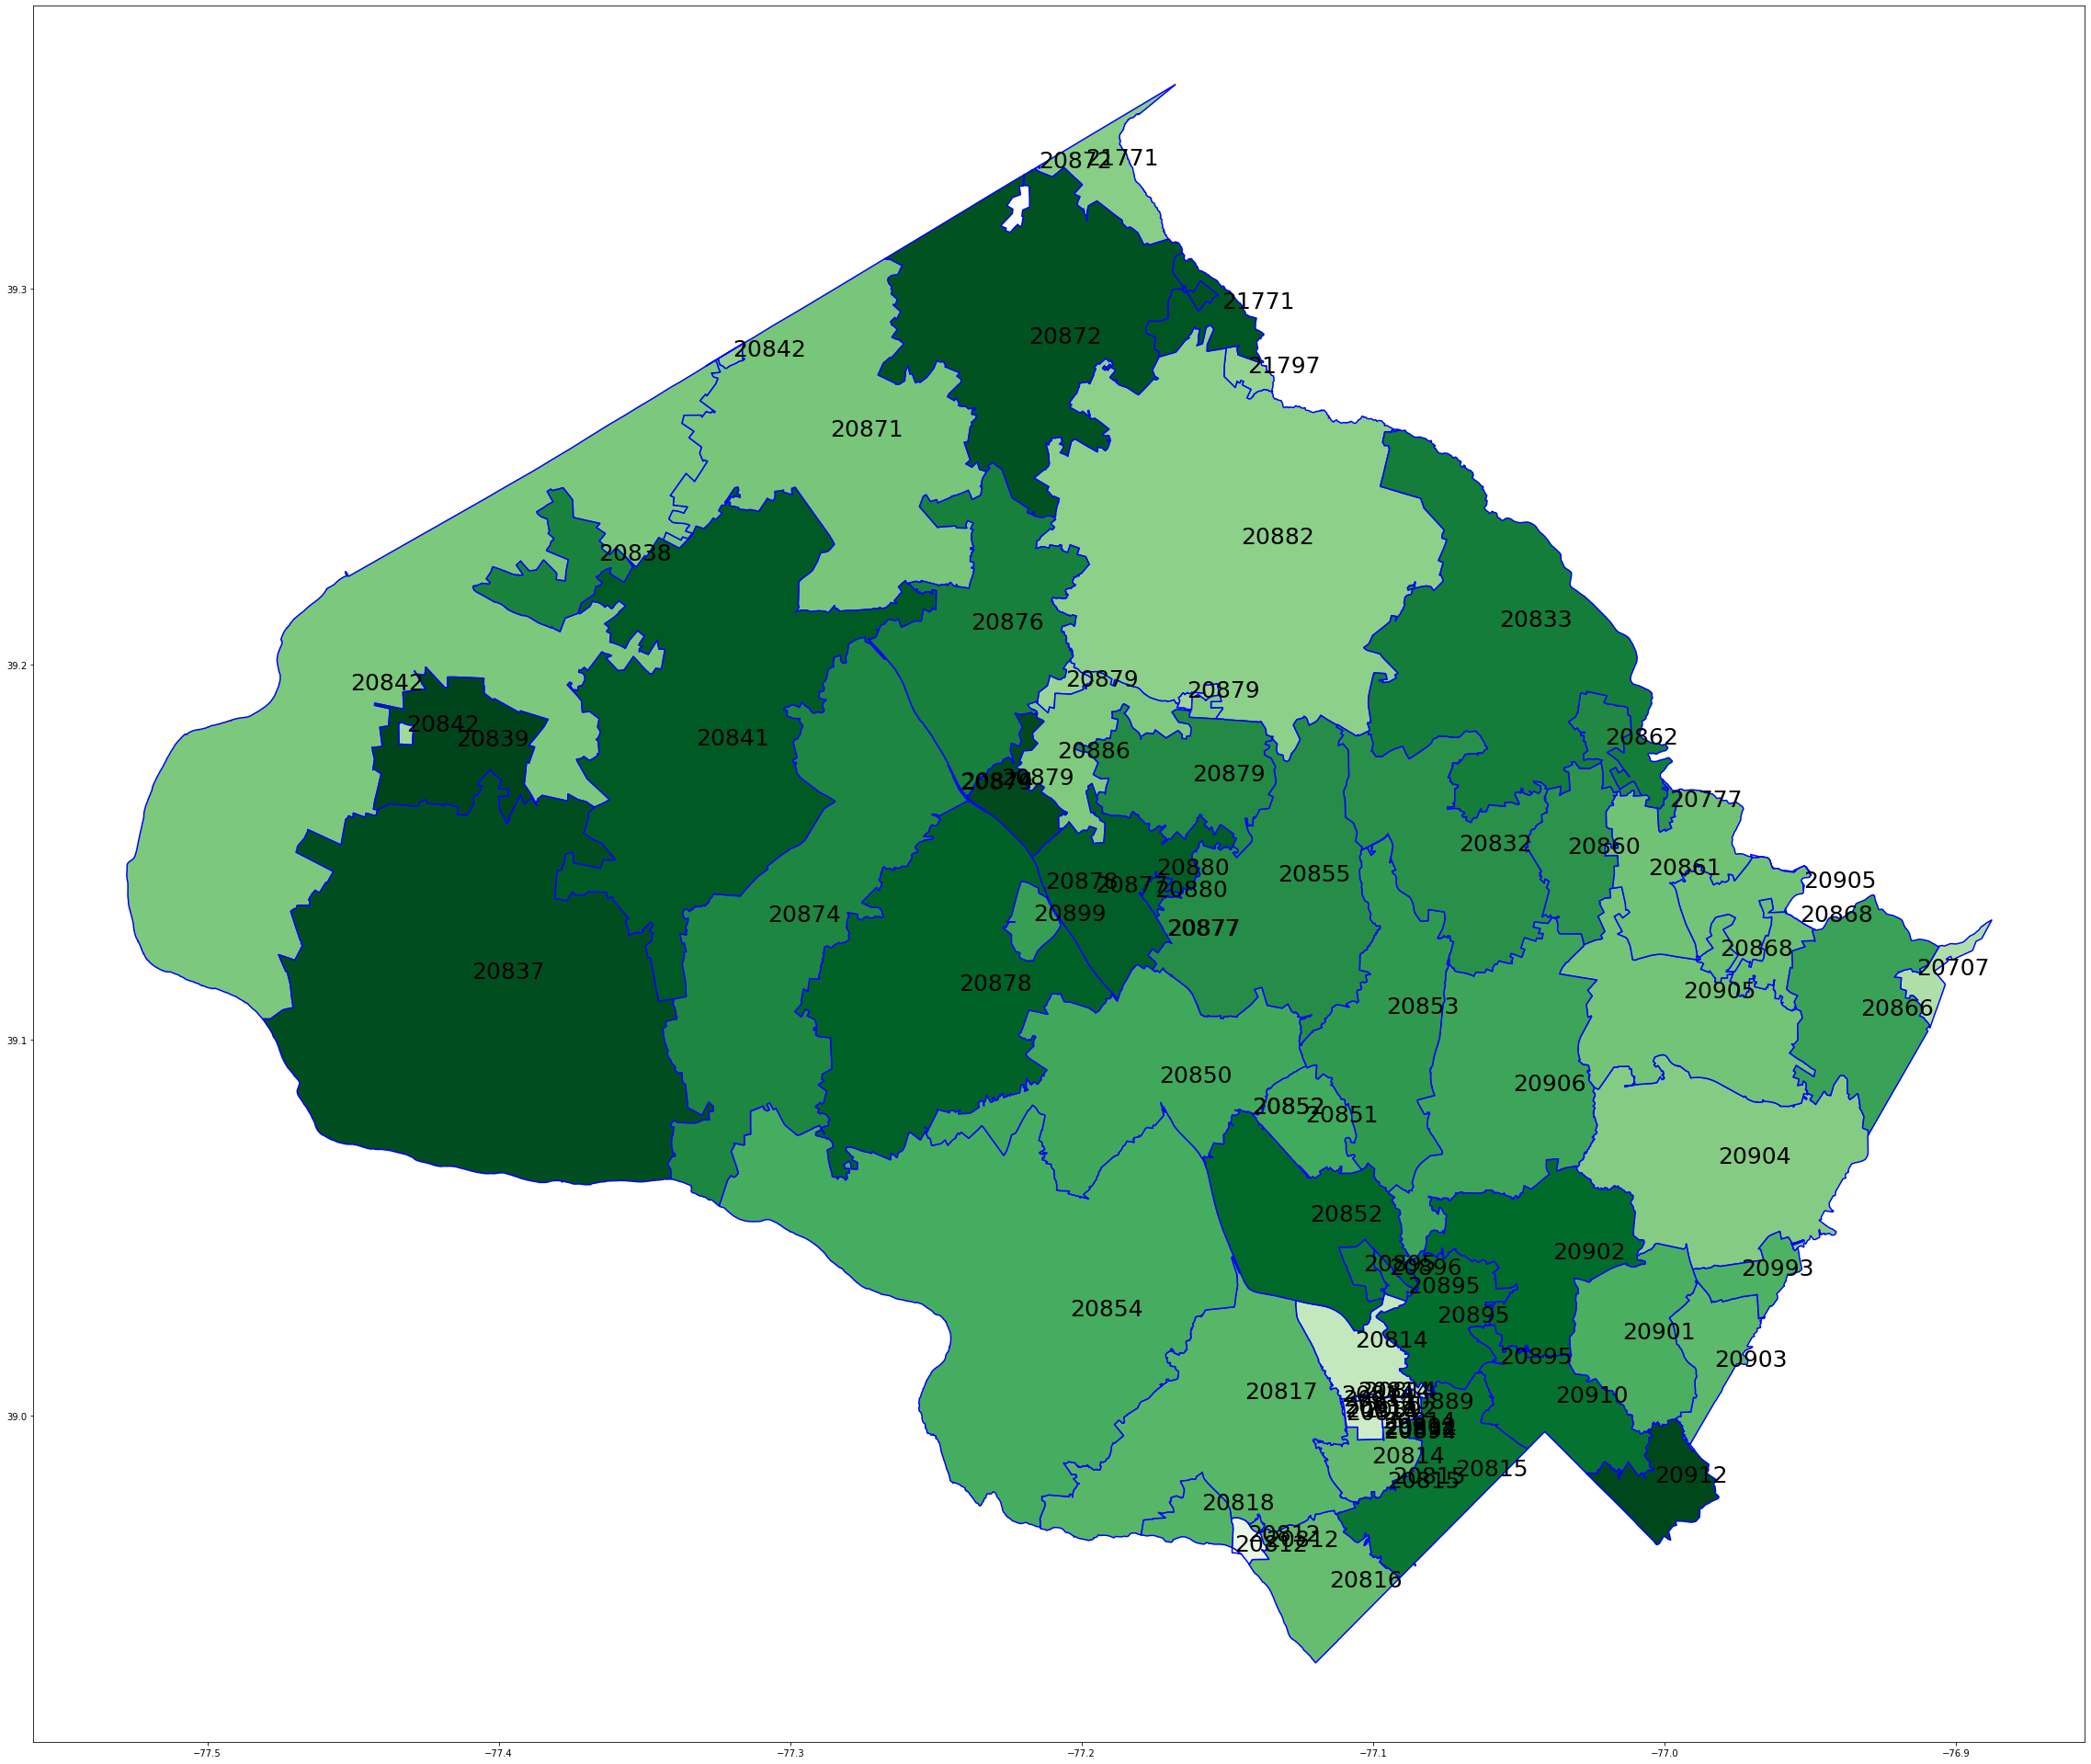

In [ ]:
mcZip.plot(figsize=(40, 40), cmap='Greens', edgecolor='blue', linewidth=1.5)

texts = []

for x, y, label in zip(mcZip.center.x, mcZip.center.y, mcZip['ZIPCODE']):
  texts.append(plt.text(x, y, label, fontsize = 25))

# aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1),
#                arrowprops=dict(arrowstyle='-', color='black', lw=1.5))
plt.show()

In [ ]:
# I think the bottom-right zip code 20993 is 20903.
mcZip['ZIPCODE'].replace({20993: 20903}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
mcZip.duplicated().sum()

0

In [ ]:
mcZip['ZIPCODE'].nunique()

52

In [ ]:
pobox = [20813, 20824, 20825, 20827, 20830, 20847, 20848, 20849, 20859, 20875, 20880, 20883, 20884, 20885, 20896,
         20891, 20898, 20907, 20908, 20911, 20913, 20914, 20915, 20916, 20918] #20880, 20896

In [ ]:
single_entity = [20810, 20811, 20857, 20889, 20892, 20894, 20897, 20899, 20993, 20997] #20889, 20899, 20892

In [ ]:
nonstd_zip = pobox + single_entity

In [ ]:
std_zip = mcZip[~mcZip['ZIPCODE'].isin(nonstd_zip)].ZIPCODE.unique()
np.sort(std_zip)

array([20707, 20777, 20812, 20814, 20815, 20816, 20817, 20818, 20832,
       20833, 20837, 20838, 20839, 20841, 20842, 20850, 20851, 20852,
       20853, 20854, 20855, 20860, 20861, 20862, 20866, 20868, 20871,
       20872, 20874, 20876, 20877, 20878, 20879, 20882, 20886, 20895,
       20901, 20902, 20903, 20904, 20905, 20906, 20910, 20912, 21771,
       21797])

In [ ]:
mcZip_std = mcZip[mcZip['ZIPCODE'].isin(std_zip)].sort_values('ZIPCODE')

In [ ]:
mcZip_std['ZIPCODE'].unique()

array([20707, 20777, 20812, 20814, 20815, 20816, 20817, 20818, 20832,
       20833, 20837, 20838, 20839, 20841, 20842, 20850, 20851, 20852,
       20853, 20854, 20855, 20860, 20861, 20862, 20866, 20868, 20871,
       20872, 20874, 20876, 20877, 20878, 20879, 20882, 20886, 20895,
       20901, 20902, 20903, 20904, 20905, 20906, 20910, 20912, 21771,
       21797])

## **MC Populations by Zip Codes**

In [ ]:
mdZcta = pd.read_csv('Maryland_Census_Data_-_ZIP_Code_Tabulation_Areas_(ZCTAs).csv')

In [ ]:
mdZcta.head()

,OBJECTID_1,ZCTA5CE10,FIRST_STAT,FIRST_GEOI,FIRST_CLAS,FIRST_MTFC,FIRST_FUNC,ZCTA5N,STATE,AREALAND,AREAWATR,POP100,HU100,NHW,NHB,NHAI,NHA,NHNH,NHO,NHT,HISP,PNHW,PNHB,PNHAI,PNHA,PNHNH,PNHO,PNHT,PHISP,POP65_,PCTPOP65_,MEDAGE,VACNS,PVACNS,PHOWN,PWOMORT,PRENT,PLT18SP,REPORT_2_P,REPORT_9_P,Shape_Length,Shape_Area
0,1,20601,24,2420601,B5,G6350,S,20601,24,115635266,387684,24156,8722,9785,11146,155,880,11,48,849,1282,40.5,46.1,0.6,3.6,0.0,0.2,3.5,5.3,1922,8.0,37.3,376,4.3,71.1,11.2,19.9,30.4,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...,89500.303353,1.903175e+08
1,2,20602,24,2420602,B5,G6350,S,20602,24,35830723,352762,24955,9736,8466,13054,116,731,15,58,999,1516,33.9,52.3,0.5,2.9,0.1,0.2,4.0,6.1,1964,7.9,32.6,769,7.9,59.7,9.0,34.4,43.6,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...,42220.214377,5.930458e+07
2,3,20603,24,2420603,B5,G6350,S,20603,24,44239637,219356,28967,10317,9625,15025,98,1446,24,65,1091,1593,33.2,51.9,0.3,5.0,0.1,0.2,3.8,5.5,1400,4.8,34.5,531,5.1,73.8,4.7,22.6,29.9,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...,50682.962600,7.295967e+07
3,4,20606,24,2420606,B5,G6350,S,20606,24,7501011,1248760,431,230,377,45,1,4,0,0,0,4,87.5,10.4,0.2,0.9,0.0,0.0,0.0,0.9,108,25.1,49.1,15,6.5,49.7,39.3,18.1,31.2,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...,41458.263845,1.221117e+07
4,5,20607,24,2420607,B5,G6350,S,20607,24,54357590,448221,9802,3504,2165,6321,33,560,3,6,234,480,22.1,64.5,0.3,5.7,0.0,0.1,2.4,4.9,847,8.6,40.9,172,4.9,83.1,10.3,7.4,22.1,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...,58903.058735,8.962880e+07


In [ ]:
# check if the two columns of representing zip codes are identical
mdZcta[mdZcta['ZCTA5CE10'] != mdZcta['ZCTA5N']].shape

(0, 42)

In [ ]:
mcZcta = mdZcta[mdZcta['ZCTA5N'].isin(std_zip)]

In [ ]:
mcZcta['ZCTA5N'].unique()

array([20707, 20777, 20812, 20814, 20815, 20816, 20817, 20818, 20832,
       20833, 20837, 20838, 20839, 20841, 20842, 20850, 20851, 20852,
       20853, 20854, 20855, 20860, 20861, 20862, 20866, 20868, 20871,
       20872, 20874, 20876, 20877, 20878, 20879, 20882, 20886, 20895,
       20901, 20902, 20903, 20904, 20905, 20906, 20910, 20912, 21771,
       21797])

In [ ]:
mcZcta.head()

,OBJECTID_1,ZCTA5CE10,FIRST_STAT,FIRST_GEOI,FIRST_CLAS,FIRST_MTFC,FIRST_FUNC,ZCTA5N,STATE,AREALAND,AREAWATR,POP100,HU100,NHW,NHB,NHAI,NHA,NHNH,NHO,NHT,HISP,PNHW,PNHB,PNHAI,PNHA,PNHNH,PNHO,PNHT,PHISP,POP65_,PCTPOP65_,MEDAGE,VACNS,PVACNS,PHOWN,PWOMORT,PRENT,PLT18SP,REPORT_2_P,REPORT_9_P,Shape_Length,Shape_Area
62,63,20707,24,2420707,B5,G6350,S,20707,24,28896187,481328,31538,13576,9599,13425,72,2849,15,111,796,4671,30.4,42.6,0.2,9.0,0.0,0.4,2.5,14.8,2998,9.5,35.7,892,6.6,53.6,12.5,38.7,32.6,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...,44625.382501,4.827461e+07
102,103,20777,24,2420777,B5,G6350,S,20777,24,19568844,110664,3314,1111,2692,155,10,274,2,2,79,100,81.2,4.7,0.3,8.3,0.1,0.1,2.4,3.0,428,12.9,45.6,27,2.4,76.3,20.1,4.5,7.7,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...,33086.301965,3.274726e+07
111,112,20812,24,2420812,B5,G6350,S,20812,24,496734,371058,255,100,230,3,0,6,0,0,6,10,90.2,1.2,0.0,2.4,0.0,0.0,2.4,3.9,33,12.9,42.4,4,4.0,72.9,19.5,9.4,4.3,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...,5468.269608,1.437529e+06
112,113,20814,24,2420814,B5,G6350,S,20814,24,13166146,52953,27642,14103,21021,1134,34,2572,20,74,695,2092,76.0,4.1,0.1,9.3,0.1,0.3,2.5,7.6,4508,16.3,40.3,838,5.9,40.5,27.7,43.9,14.4,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...,32694.708048,2.192136e+07
113,114,20815,24,2420815,B5,G6350,S,20815,24,14066048,35097,29082,13850,23357,1256,28,1804,13,90,702,1832,80.3,4.3,0.1,6.2,0.0,0.3,2.4,6.3,6002,20.6,45.4,759,5.5,45.4,28.9,36.2,13.5,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...,30177.706413,2.337013e+07


In [ ]:
mcZcta.columns

Index(['OBJECTID_1', 'ZCTA5CE10', 'FIRST_STAT', 'FIRST_GEOI', 'FIRST_CLAS',
       'FIRST_MTFC', 'FIRST_FUNC', 'ZCTA5N', 'STATE', 'AREALAND', 'AREAWATR',
       'POP100', 'HU100', 'NHW', 'NHB', 'NHAI', 'NHA', 'NHNH', 'NHO', 'NHT',
       'HISP', 'PNHW', 'PNHB', 'PNHAI', 'PNHA', 'PNHNH', 'PNHO', 'PNHT',
       'PHISP', 'POP65_', 'PCTPOP65_', 'MEDAGE', 'VACNS', 'PVACNS', 'PHOWN',
       'PWOMORT', 'PRENT', 'PLT18SP', 'REPORT_2_P', 'REPORT_9_P',
       'Shape_Length', 'Shape_Area'],
      dtype='object')

In [ ]:
mcZcta.to_csv('mcZcta.csv')

In [ ]:
pop_col = ['ZCTA5N', 'AREALAND', 'AREAWATR', 'POP100', 'HU100', 'NHW', 'NHB', 'NHAI', 'NHA', 'NHNH', 
           'NHO', 'NHT', 'HISP', 'PNHW', 'PNHB', 'PNHAI', 'PNHA', 'PNHNH', 'PNHO', 'PNHT', 'PHISP', 
           'POP65_', 'PCTPOP65_', 'Shape_Area']
mcPop = mcZcta[pop_col]
mcPop.head()

,ZCTA5N,AREALAND,AREAWATR,POP100,HU100,NHW,NHB,NHAI,NHA,NHNH,NHO,NHT,HISP,PNHW,PNHB,PNHAI,PNHA,PNHNH,PNHO,PNHT,PHISP,POP65_,PCTPOP65_,Shape_Area
62,20707,28896187,481328,31538,13576,9599,13425,72,2849,15,111,796,4671,30.4,42.6,0.2,9.0,0.0,0.4,2.5,14.8,2998,9.5,4.827461e+07
102,20777,19568844,110664,3314,1111,2692,155,10,274,2,2,79,100,81.2,4.7,0.3,8.3,0.1,0.1,2.4,3.0,428,12.9,3.274726e+07
111,20812,496734,371058,255,100,230,3,0,6,0,0,6,10,90.2,1.2,0.0,2.4,0.0,0.0,2.4,3.9,33,12.9,1.437529e+06
112,20814,13166146,52953,27642,14103,21021,1134,34,2572,20,74,695,2092,76.0,4.1,0.1,9.3,0.1,0.3,2.5,7.6,4508,16.3,2.192136e+07
113,20815,14066048,35097,29082,13850,23357,1256,28,1804,13,90,702,1832,80.3,4.3,0.1,6.2,0.0,0.3,2.4,6.3,6002,20.6,2.337013e+07


In [ ]:
# merge MC Population to MC Zip Codes
mcZipPop = pd.merge(mcZip_std, mcPop, left_on='ZIPCODE', right_on='ZCTA5N', how='left')
mcZipPop.head()

,OBJECTID,ZIPCODE,POSTAL,STATE,SDEZIPCODE,geometry,center,Area,ZCTA5N,AREALAND,AREAWATR,POP100,HU100,NHW,NHB,NHAI,NHA,NHNH,NHO,NHT,HISP,PNHW,PNHB,PNHAI,PNHA,PNHNH,PNHO,PNHT,PHISP,POP65_,PCTPOP65_,Shape_Area
0,694,20707,LAUREL,MD,2.188329e+07,"POLYGON ((-76.88776 39.13176, -76.89107 39.127...",POINT (-76.91335 39.11759),2.117661e-04,20707,28896187,481328,31538,13576,9599,13425,72,2849,15,111,796,4671,30.4,42.6,0.2,9.0,0.0,0.4,2.5,14.8,2998,9.5,4.827461e+07
1,831,20777,HIGHLAND,MD,5.643254e+06,"POLYGON ((-77.00054 39.16932, -77.00038 39.169...",POINT (-76.99845 39.16212),5.464360e-05,20777,19568844,110664,3314,1111,2692,155,10,274,2,2,79,100,81.2,4.7,0.3,8.3,0.1,0.1,2.4,3.0,428,12.9,3.274726e+07
2,412,20812,GLEN ECHO,MD,2.387338e+05,"POLYGON ((-77.14515 38.96322, -77.14542 38.963...",POINT (-77.14747 38.96407),2.305356e-06,20812,496734,371058,255,100,230,3,0,6,0,0,6,10,90.2,1.2,0.0,2.4,0.0,0.0,2.4,3.9,33,12.9,1.437529e+06
3,705,20812,GLEN ECHO,MD,8.217468e+01,"POLYGON ((-77.13602 38.96457, -77.13602 38.964...",POINT (-77.13670 38.96539),7.934109e-10,20812,496734,371058,255,100,230,3,0,6,0,0,6,10,90.2,1.2,0.0,2.4,0.0,0.0,2.4,3.9,33,12.9,1.437529e+06
4,673,20812,GLEN ECHO,MD,9.800011e+06,"POLYGON ((-77.14565 38.97274, -77.14540 38.972...",POINT (-77.14297 38.96671),9.463812e-05,20812,496734,371058,255,100,230,3,0,6,0,0,6,10,90.2,1.2,0.0,2.4,0.0,0.0,2.4,3.9,33,12.9,1.437529e+06


In [ ]:
mcZipPop['Area'].describe()

count    8.000000e+01
mean     1.703303e-03
std      2.683564e-03
min      1.786486e-13
25%      1.431107e-06
50%      5.124670e-04
75%      2.091833e-03
max      1.132897e-02
Name: Area, dtype: float64

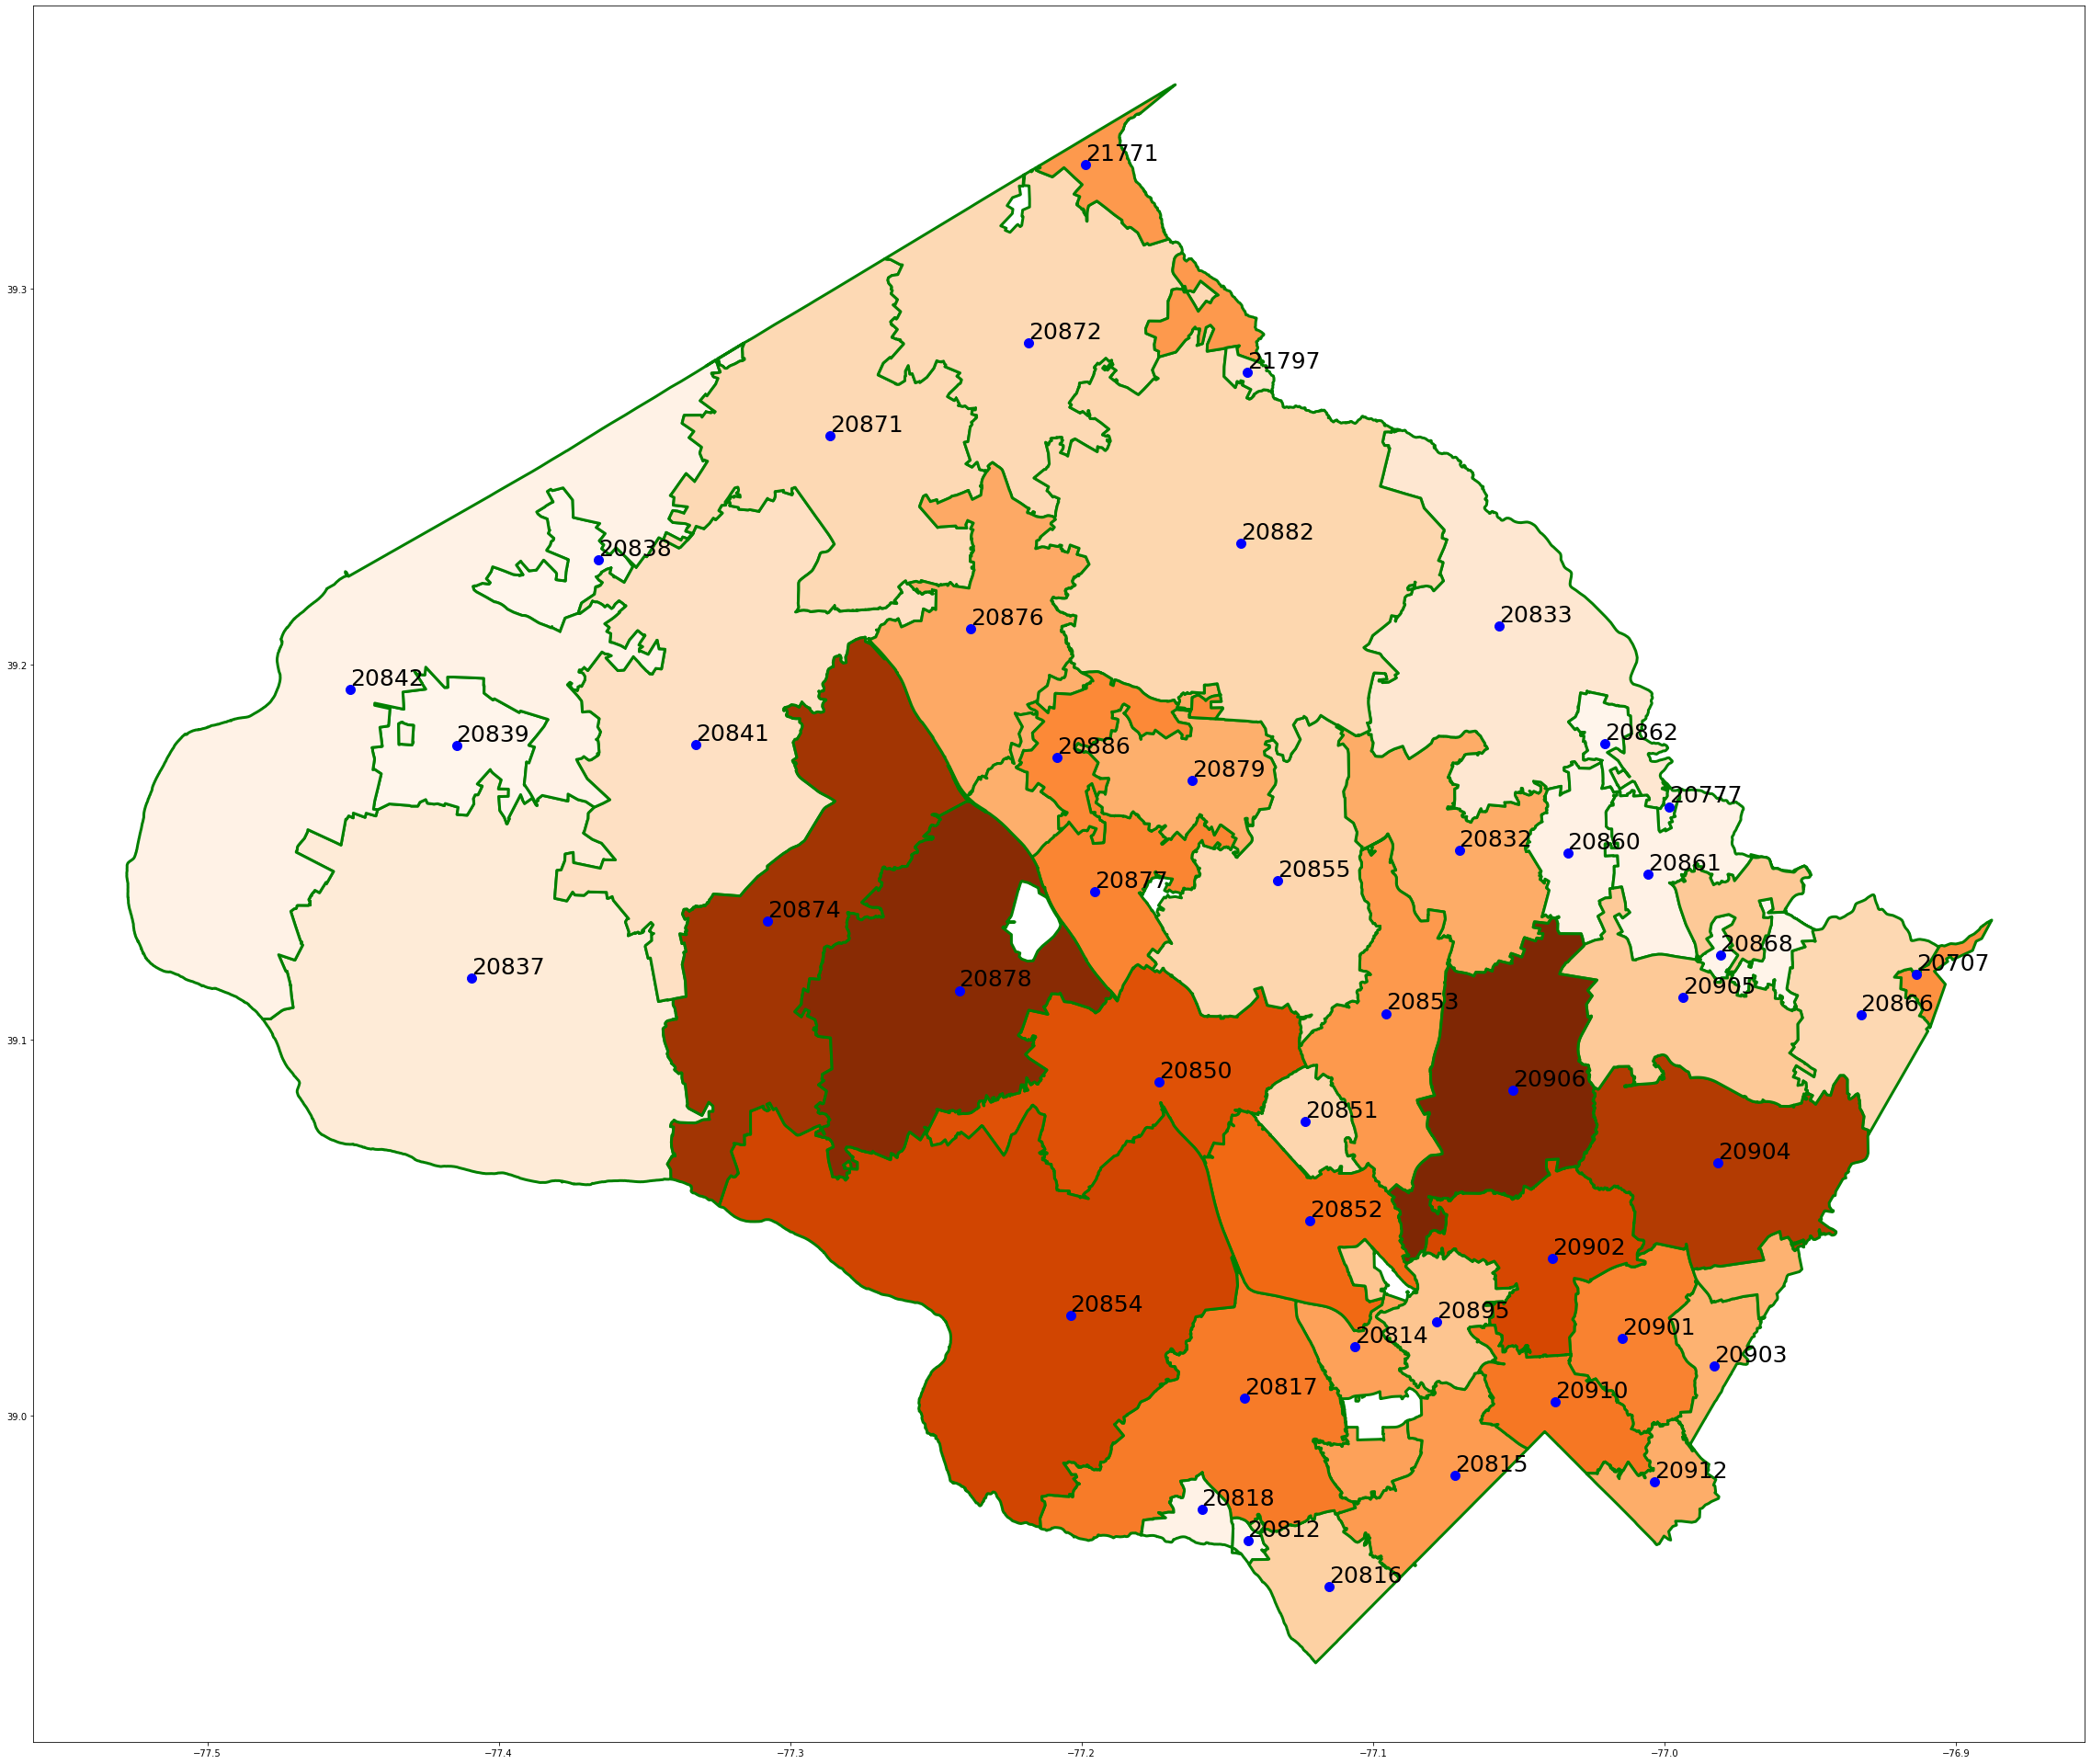

In [ ]:
fig, ax = plt.subplots(figsize=[40,40])

mcZipPop.plot(column='POP100', cmap='Oranges', edgecolor='green', linewidth=3, ax=ax)

texts = []
# add the center and zip code in the data for each zip code to the map
for z in std_zip:
  area = np.zeros([2,1])
  # for each zip code, collect the indicies and areas and then find the index corresponding to the largest area
  for ind in range(0, len(mcZipPop)):
    if mcZipPop.iloc[ind, 1] == z:
      area1 = np.array([[ind], [mcZipPop.iloc[ind, 7]]]) # index and area
      area = np.concatenate((area, area1), axis=1)
  max_ind = np.argmax(area[1]) # index in the array 'area' of the largest area
  index = int(area[0][max_ind]) # index in the data of the largest area
  # locate the center and zip code in the data
  lon, lat, label = mcZipPop.iloc[index].center.x, mcZipPop.iloc[index].center.y, mcZipPop.iloc[index].ZIPCODE
  plt.plot(lon, lat, 'ob', markersize=10) # plot the centers
  texts.append(plt.text(lon, lat, label, color='black', fontsize = 25)) # plot the zip codes

aT.adjust_text(texts, force_points=(0.2, 0), force_text=(0.5, 0), expand_points=(1,1), expand_text=(1,1))

plt.show()

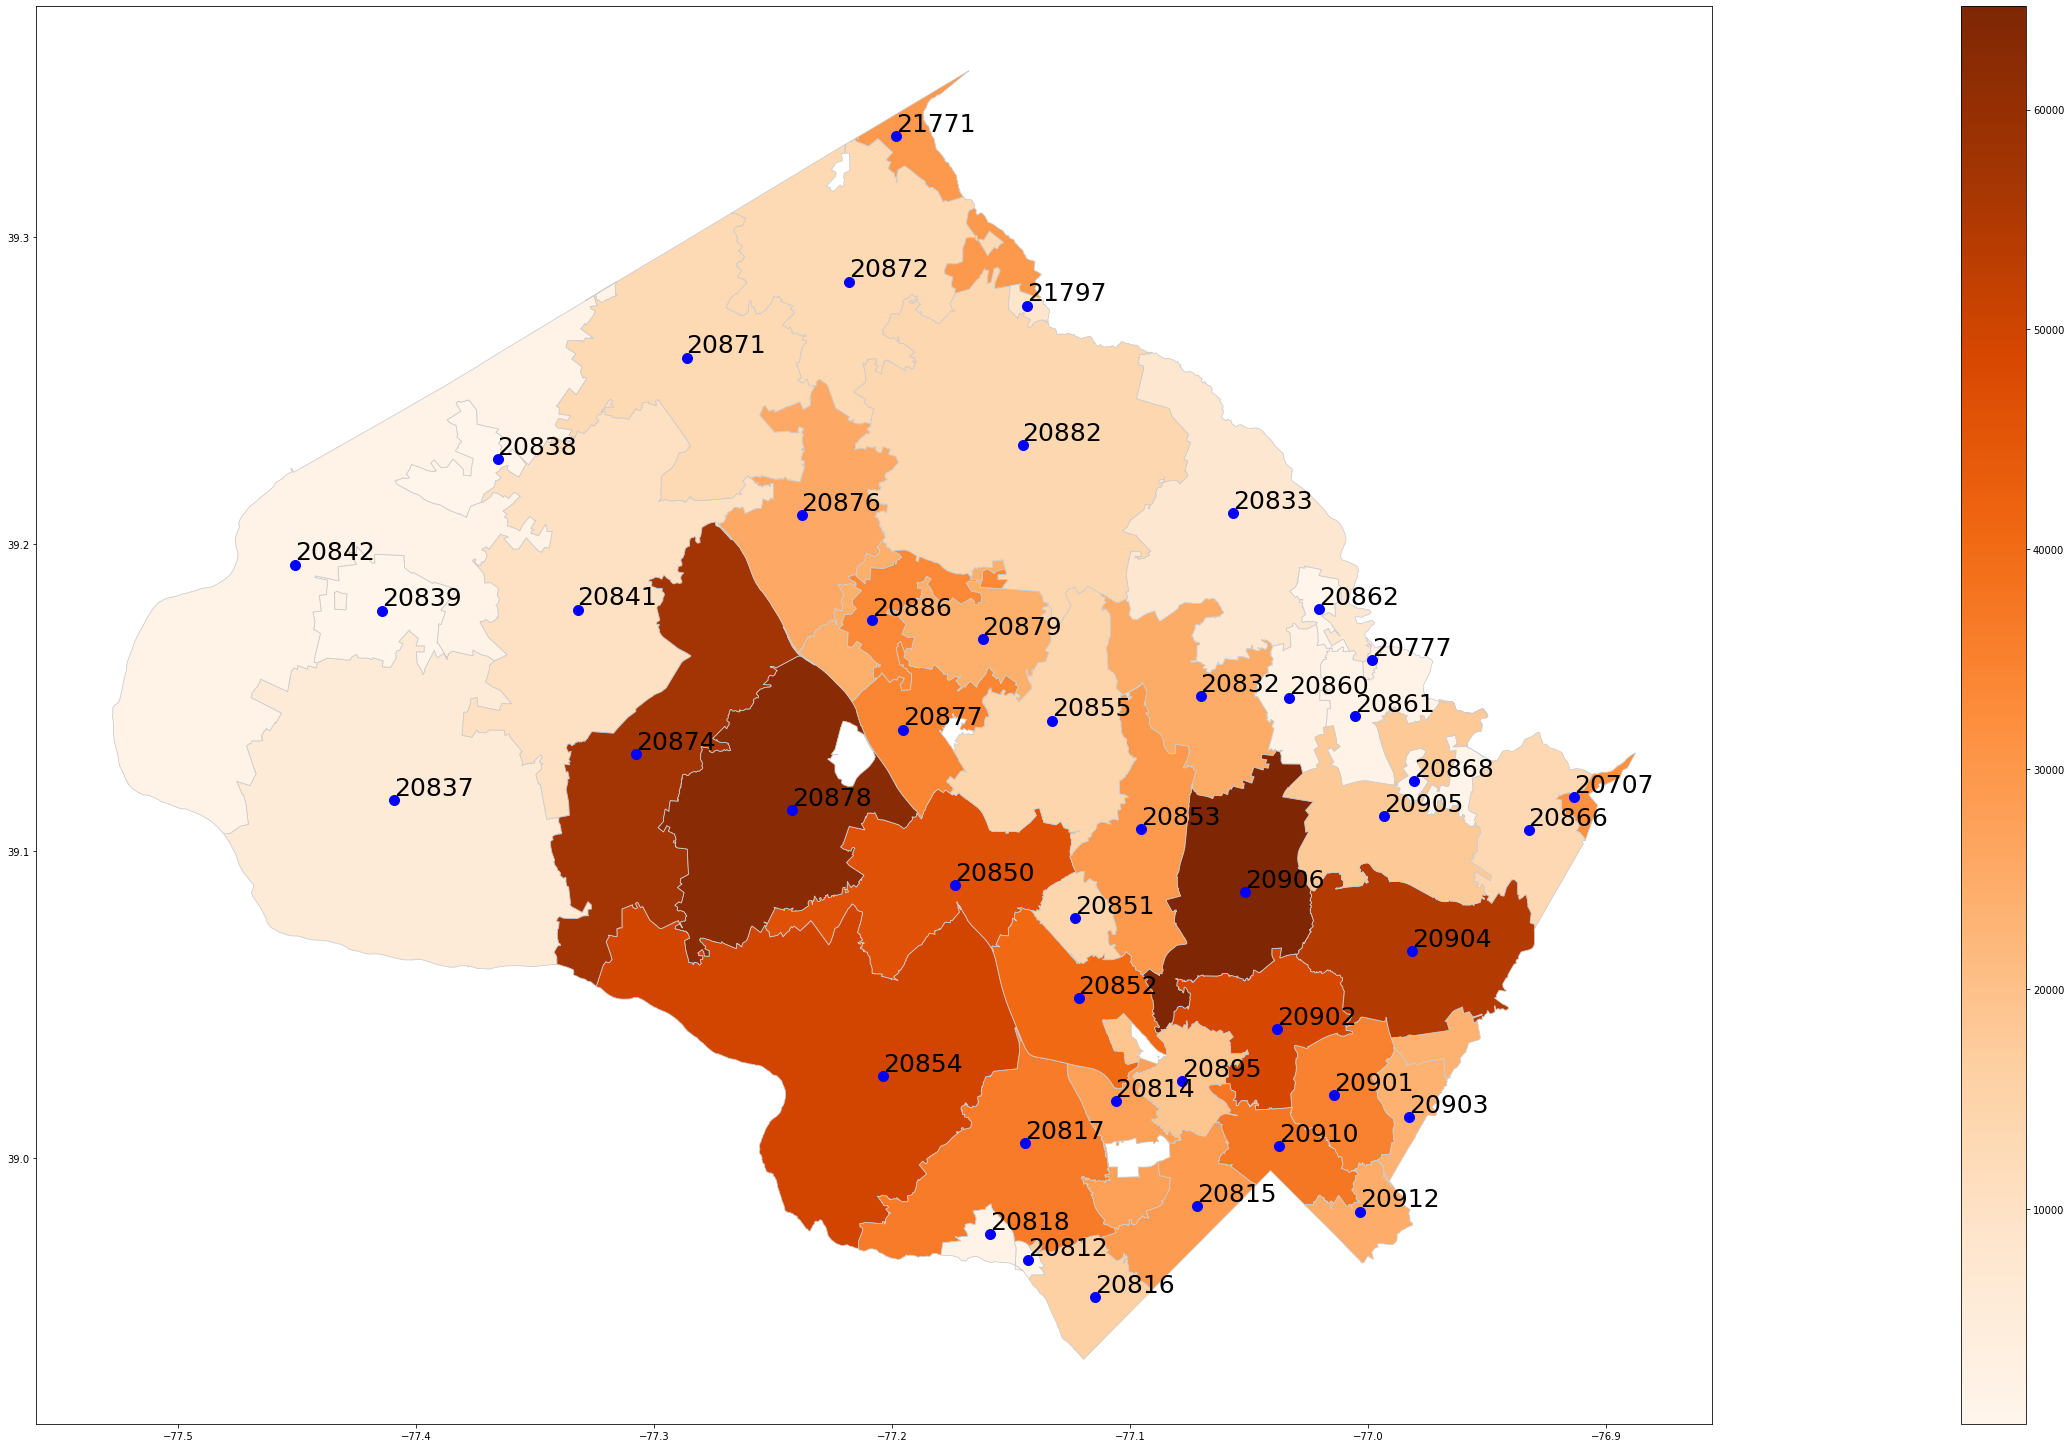

In [ ]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

fig, ax = plt.subplots(figsize=[40,40])

texts = []
# add the center and zip code in the data for each zip code to the map
for z in std_zip:
  area = np.zeros([2,1])
  # for each zip code, collect the indicies and areas and then find the index corresponding to the largest area
  for ind in range(0, len(mcZipPop)):
    if mcZipPop.iloc[ind, 1] == z:
      area1 = np.array([[ind], [mcZipPop.iloc[ind, 7]]]) # index and area
      area = np.concatenate((area, area1), axis=1)
  max_ind = np.argmax(area[1]) # index in the array 'area' of the largest area
  index = int(area[0][max_ind]) # index in the data of the largest area
  # locate the center and zip code in the data
  lon, lat, label = mcZipPop.iloc[index].center.x, mcZipPop.iloc[index].center.y, mcZipPop.iloc[index].ZIPCODE
  plt.plot(lon, lat, 'ob', markersize=10) # plot the centers
  texts.append(plt.text(lon, lat, label, color='black', fontsize = 25)) # plot the zip codes

aT.adjust_text(texts, force_points=(0.2, 0), force_text=(0.5, 0), expand_points=(1,1), expand_text=(1,1))

# create an axes on the right side of ax. 
# The width of cax will be 5% of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='3%', pad=0.1)

mcZipPop.plot(column='POP100', cmap='Oranges', linewidth=0.8, edgecolor='0.8', legend=True, ax=ax, cax=cax)

plt.show()